# Get cell centroids from segmentation masks

The image is just a segmentation mask and does not contain any other metadata (as retrievable using aicsimageio)

In [4]:
## Imports for data handling
from tifffile import imread
import numpy as np
from scipy.ndimage import center_of_mass

## Imports for plotting
import matplotlib.pyplot as plt
from scipy.stats import rankdata

In [2]:
img = imread("../data/Kuett_2022/MainHer2BreastCancerModel/measured_mask_final_segmentation_hwatershed_500.00_90%.tif")
img.dtype, img.shape ## (z, y, x)

(dtype('uint32'), (152, 488, 652))

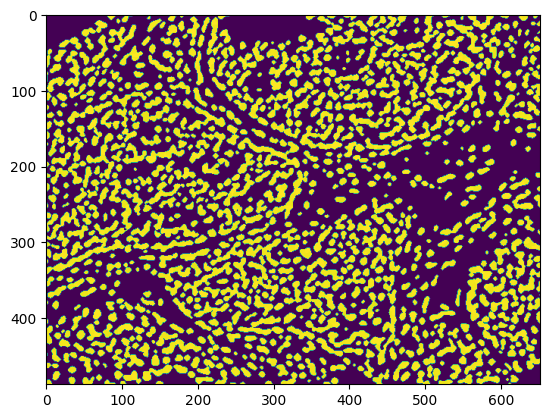

In [37]:
## View first slice
plt.imshow(img[1,:,:])

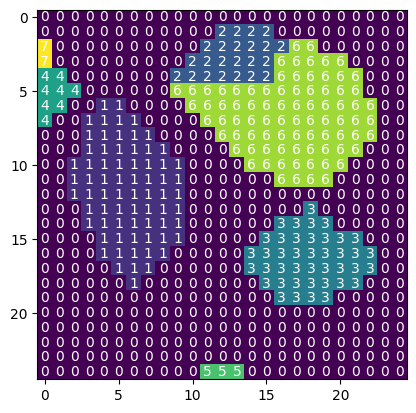

In [160]:
## Create small 2D crop for testing
crop = img[1,103:128,5:30]
crop = rankdata(crop, method='dense').reshape(crop.shape) - 1 ## for plotting

## Plot
fig, ax = plt.subplots()
ax.imshow(crop)
for i in range(crop.shape[0]):
    for j in range(crop.shape[1]):
        text = ax.text(j, i, crop[i, j],
                       ha="center", va="center", color="w")
plt.show()

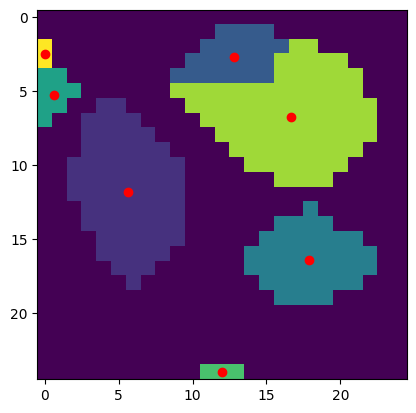

In [161]:
## Calculate centroids in 2D
labels = np.unique(crop)
labels = labels[labels != 0]

## Compute the centroids
centroids = {}
for label in labels:
    centroids[label] = center_of_mass(crop == label)

## Plot
for centroid in centroids.values():
    plt.scatter(centroid[1], centroid[0], c='red')
plt.imshow(crop)
plt.show()

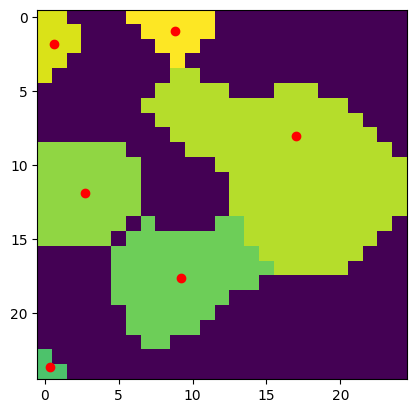

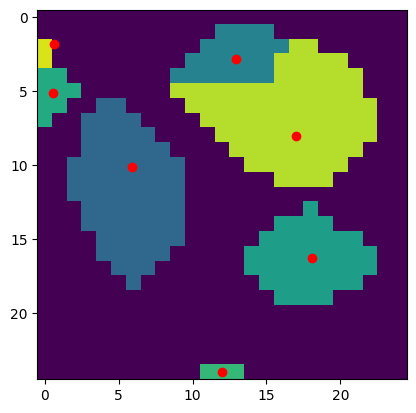

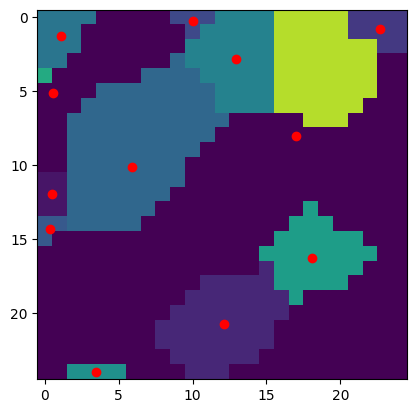

In [162]:
## Calculate centroids on a 3D crop
crop = img[0:3,103:128,5:30]
crop = rankdata(crop, method='dense').reshape(crop.shape) - 1 ## for plotting

labels = np.unique(crop)
labels = labels[labels != 0]

## Compute the centroids
centroids = {}
for label in labels:
    centroids[label] = center_of_mass(crop == label)

for i in range(3):
    plt.imshow(crop[i,:,:], vmin=0, vmax=labels.max()) ## one z slice
    curr_labels = np.unique(crop[i,:,:]) ## cells in this z slice
    curr_centroids = [ centroids[label] for label in curr_labels[curr_labels!=0] ]
    for centroid in curr_centroids:
        plt.scatter(centroid[2], centroid[1], c='red')
    plt.show()

In [174]:
## Process the entire image (2D)
outfile_2D = "../data/Kuett_2022/MainHer2BreastCancerModel/measured_mask_centroids_2D.csv"
slices_of_interest = img.shape[0] ## all slices

# TODO - speed up (slicing?)
with(open(outfile_2D, 'w')) as f:
    f.write("z,y,x,label\n")
    for i in range(slices_of_interest):
        img2D = img[i,:,:]
        labels = np.unique(img2D)
        labels = labels[labels != 0]
        for label in labels:
            centroid = center_of_mass(img2D == label)
            f.write(f"{i},{centroid[0]:.2f},{centroid[1]:.2f},{label}\n") ## rounded to 2 decimal places

In [6]:
## Process the entire image (3D)
outfile_3D = "../data/Kuett_2022/MainHer2BreastCancerModel/measured_mask_centroids_3D.csv"

# TODO - speed up
with(open(outfile_3D, 'w')) as f:
    f.write("z,y,x,label\n")
    labels = np.unique(img)
    labels = labels[labels != 0]
    for label in labels:
        centroid = center_of_mass(img == label)
        f.write(f"{centroid[0]:.2f},{centroid[1]:.2f},{centroid[2]:.2f},{label}\n") ## rounded to 2 decimal places